In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ETFunctions as et
%matplotlib inline

# Combined analysis of 20x2020 seasons 2013, 2014, 2015 and 2016
### Note that latest version of input data should be obtained from iPlant site "Data compilation updated"

### Make some helper functions

In [2]:
def MakeLabel(Treat):
    label = ''
    for level in Treat.index:
        label += str(Treat.loc[level]) + ' '
    return label

def MakeYearIndex(Year):
    GraphTreats = GrandIndex.loc[Year,:].dropna(axis=1,how='all')
    for Fact in GraphTreats.columns:
        if len(GraphTreats.loc[:,Fact].drop_duplicates()) <=1:
            GraphTreats.drop(Fact,axis=1,inplace=True)
    return GraphTreats

def SetLineSymbols(Index):
    Colors = ['red','orange','blue','green','black','pink']
    Markers = ['o-','s-','^-','*-','+-','x-']
    Sizes = [12,10,8,6,4,2]
    Demarkers = [Colors, Markers, Sizes]
    DemarkerIndex = []
    FactorNumber = 0
    for Fact in Index.columns:
        LevelList = Index.loc[:,Fact].drop_duplicates().values
        FactorLevels = LevelList.size
        LevelDemarkers = Demarkers[FactorNumber][0:FactorLevels]
        LevelPairs = pd.Series(data=LevelDemarkers, index=LevelList)
        DemarkerIndex.append(LevelPairs)
        FactorNumber +=1
    return DemarkerIndex

def SetSymbols(Index):
    Colors = ['red','orange','blue','green']
    Markers = ['o','s','^','*','+','x']
    Sizes = [12,10,8,6,4,2]
    Demarkers = [Colors, Markers, Sizes]
    DemarkerIndex = []
    FactorNumber = 0
    for Fact in Index.columns:
        LevelList = Index.loc[:,Fact].drop_duplicates().values
        FactorLevels = LevelList.size
        LevelDemarkers = Demarkers[FactorNumber][0:FactorLevels]
        LevelPairs = pd.Series(data=LevelDemarkers, index=LevelList)
        DemarkerIndex.append(LevelPairs)
        FactorNumber +=1
    return DemarkerIndex

def FindAxisMax(DataArray):
    Max = np.percentile(pd.to_numeric(DataArray.dropna()),99)
    Exponent = np.power(10,len(str(int(Max))))
    return np.ceil(Max/Exponent*10)*Exponent/10

def FindAxisMin(DataArray):
    Min = np.percentile(pd.to_numeric(DataArray.dropna()),1)
    Exponent = np.power(10,len(str(int(Min))))
    return np.floor(Min/Exponent*10)*Exponent/10

def MakeSingleVariableRegression(XVar,YVar):
    Graph = plt.figure(figsize=(10,10))
    Yup = FindAxisMax(IndexedData.loc[:,YVar ])
    Ylow = FindAxisMin(IndexedData.loc[:,YVar ])
    Xup = FindAxisMax(IndexedData.loc[:,XVar ])
    Xlow = FindAxisMin(IndexedData.loc[:,XVar ])

    pos=1
    for Year in YearList:
        Ax = Graph.add_subplot(2,2,pos)
        Ax.spines['right'].set_visible(False)
        Ax.spines['top'].set_visible(False)
        plt.tick_params(axis='x', which='both', bottom='on',top='off', labelbottom='on')
        plt.tick_params(axis='y', which='both', left='on',right='off', labelbottom='on')
        GraphData = IndexedData.loc[IndexedData.YearSown==Year]
        GraphTreats = GrandIndex.loc[Year,:].dropna(axis=1,how='all')
        for var in GraphTreats.columns:
            LevelList = GraphTreats.loc[:,var].drop_duplicates().values
            if LevelList.size <= 1:
                GraphTreats.drop(var,axis=1,inplace=True)
        Demarkers = SetSymbols(GraphTreats)
        for Treat in GraphTreats.index:
            Filter = GraphData.TrtNum == Treat
            XData = GraphData.loc[Filter,XVar]
            YData = GraphData.loc[Filter,YVar]
            col = Demarkers[0][GraphTreats.loc[Treat][0]]
            mark = Demarkers[1][GraphTreats.loc[Treat][1]]
            plt.plot(XData,YData,mark,color=col,markersize=12)
            plt.plot([Xlow,Xup],[Ylow,Yup],'--',color='k')
            plt.title(Year,fontsize = 20)
        plt.ylim(Ylow,Yup)
        plt.xlim(Xlow,Xup)
        Ax.set_xticks([Ax.get_xticks()[0],Ax.get_xticks()[-1]])
        Ax.set_yticks([Ax.get_yticks()[1],Ax.get_yticks()[-1]])
        if pos in [1,3]:
            plt.ylabel(YVar,fontsize=16)
        if pos in [2,3]:
            plt.xlabel(XVar,fontsize=16)
        pos+=1

def MakeHarvestVariableGraph(Variable):
    Graph = plt.figure(figsize=(10,10))
    pos=1
    TreatInLabel = pd.Series(index = YearList, data = [[1],[1],[0,2],[0,2]])
    Yup = FindAxisMax(IndexedData.loc[:,Variable ])
    for Year in YearList:
        Pannel = Graph.add_subplot(len(YearList),1,pos)
        plt.ylim(0,Yup)
        plt.tick_params(labelsize=20)
        Pannel.tick_params(labelbottom='off')
        if Year == 2014:
            plt.ylabel(Variable, fontsize = 20)
        GraphData = pd.to_numeric(IndexedData[GS90Filter].loc[Year,Variable].dropna())
        MeanData = GraphData.groupby(GraphData.index).mean()
        Left = 0
        count = 0
        LastSowIndex = MeanData.index[count][0]
        for Treat in MeanData.index:
            SowLab = MeanData.index[count][0].to_datetime().strftime('%d-%b')
            if count == 0:
                plt.text(Left+1,Yup*0.9,SowLab,fontsize=18)
            if LastSowIndex != MeanData.index[count][0]:
                Left+=1
                plt.text(Left+1,Yup*0.9,SowLab,fontsize=18)
            plt.bar(left=Left+.5,height=MeanData[count],color='lightgrey')
            FullLab = MeanData.index[count][1:]
            forShort = TreatInLabel[Year]
            LabMembers = [FullLab[i] for i in forShort]
            Label = ''
            for member in LabMembers:
                Label += str(member)
                Label += '  '
            height = MeanData[count] * 0.95
            plt.text(Left+.7,height, Label,rotation=90, fontsize=10)
            Left += 1
            LastSowIndex = MeanData.index[count][0]
            count += 1
        pos +=1
        
def MakeTimeCoarseGraph(Year,Variable):
    GraphData = Data.loc[Data.YearSown==Year]
    GraphTreats = GrandIndex.loc[Year,:].dropna(axis=1,how='all')
    for var in GraphTreats.columns:
            LevelList = GraphTreats.loc[:,var].drop_duplicates().values
            if LevelList.size <= 1:
                GraphTreats.drop(var,axis=1,inplace=True)
    Demarkers = SetLineSymbols(GraphTreats)
    Graph = plt.figure(figsize=(8,6))

    for Treat in GraphTreats.index:
        Filter = (Data.YearSown == Year) & (Data.TrtNum == Treat)
        GraphData = Data.loc[Filter,Variable].dropna().groupby(level='SampleDate').mean()
        col = Demarkers[0][GraphTreats.loc[Treat][0]]
        mark = Demarkers[1][GraphTreats.loc[Treat][1]]
        try:
            size = Demarkers[2][GraphTreats.loc[Treat][2]]
        except:
            size = 8
        plt.plot(GraphData,mark,color = col, markersize = size,label = MakeLabel(GraphTreats.loc[Treat,:]))
    plt.xticks(rotation=45)
    plt.ylabel(Variable,fontsize=12)
    plt.tick_params(labelsize=16)
    plt.legend(bbox_to_anchor=(1.45, 1),numpoints=1)
    
def MakeThermalTimeCoarseGraphWithGS(Variable,GSsToGraph,YearsToGraph):
    Colors = ['red','orange','blue','green']
    Markers = ['o-','s-','^-','*-']
    Markers2 = ['o','s','^','*']
    Sizes = [12,10,8,6,4,2]
    Graph = plt.figure(figsize=(12,16))
    YearPos = 0
    for Year in YearsToGraph:
        filter = Data.loc[:,'YearSown'] == Year
        SowDates = pd.to_datetime(Data.loc[filter,'SowingDate'].drop_duplicates().values)
        TreatPos = 0
        Graph.add_subplot(3,1,YearPos+1)
        for Treat in SowDates:
            Filter = (Data.YearSown == Year) & (Data.SowingDate == Treat) & (Data.Cultivar == 'Wakanui')  & (Data.PlantPopn==200)
            GraphData = pd.to_numeric(Data.loc[Filter,Variable].dropna()).groupby(level='SampleDate').mean()
            TtFromSow = pd.to_numeric(Data.loc[Filter,'TtFromSowing'].loc[GraphData.index].dropna()).groupby(level='SampleDate').mean()
            plt.plot(TtFromSow,GraphData,Markers[YearPos],color = Colors[TreatPos], markersize = 8)
            subfilter = (Data.loc[:,'YearSown'] == Year) & (Data.loc[:,'SowingDate']==Treat)
            Date =  Data.loc[subfilter,'GS65'].dropna().drop_duplicates()
            if len(GSsToGraph)>0:
                TtatSow = Data.loc[subfilter,'TTAtSow'].drop_duplicates()
                TTSowTo65 = MetData.loc[Date,'Tt'].values[0]-TtatSow.values[0]
                TTSowTo32 = TTSowTo65 - Post32ZadocModel.loc[Post32ZadocModel.Zstage==65,'TTsinceGS32'].values[0]
                TTSowTo45 = TTSowTo65 - Post32ZadocModel.loc[Post32ZadocModel.Zstage==45,'TTsinceGS32'].values[0]
                plt.plot([TTSowTo32,TTSowTo32],[1.1,0.0],Markers[YearPos],color = Colors[TreatPos], markersize = 8)
            TreatPos +=1
        YearPos+=1
    plt.xticks(rotation=45)
    plt.ylabel(Variable,fontsize=12)
    plt.tick_params(labelsize=16)
    plt.legend(bbox_to_anchor=(1.45, 1),numpoints=1)
    
def MakeThermalTimeCoarseGraph(Variable,YearsToGraph):
    Colors = ['red','orange','blue','green']
    Markers = ['o-','s-','^-','*-']
    Markers2 = ['o','s','^','*']
    Sizes = [12,10,8,6,4,2]
    Graph = plt.figure(figsize=(12,16))
    YearPos = 0
    for Year in YearsToGraph:
        GraphData = Data.loc[Data.YearSown==Year]
        GraphTreats = MakeYearIndex(Year)
        Demarkers = SetLineSymbols(GraphTreats)
        filter = Data.loc[:,'YearSown'] == Year
        SowDates = pd.to_datetime(Data.loc[filter,'SowingDate'].drop_duplicates().values)
        TreatPos = 0
        Graph.add_subplot(3,1,YearPos+1)
        for Treat in SowDates:
            Filter = (Data.YearSown == Year) & (Data.SowingDate == Treat) #& (Data.Cultivar == 'Wakanui')  & (Data.PlantPopn==200)
            GraphData = pd.to_numeric(Data.loc[Filter,Variable].dropna()).groupby(level='SampleDate').mean()
            TtFromSow = pd.to_numeric(Data.loc[Filter,'TtFromSowing'].loc[GraphData.index].dropna()).groupby(level='SampleDate').mean()
            plt.plot(TtFromSow,GraphData,Markers[YearPos],color = Colors[TreatPos], markersize = 8)
            subfilter = (Data.loc[:,'YearSown'] == Year) & (Data.loc[:,'SowingDate']==Treat)
            TreatPos +=1
        YearPos+=1
    plt.xticks(rotation=45)
    plt.ylabel(Variable,fontsize=12)
    plt.tick_params(labelsize=16)
    plt.legend(bbox_to_anchor=(1.45, 1),numpoints=1)

### Bring in the Crop Data

In [61]:
Data = pd.read_excel('Data compilation updated.xlsx',sheetname='DataCompiled',skiprows=[0,1,2])

### Set up some index objects

In [62]:
TreatmentList = Data.TrtNum.drop_duplicates().values
print('TreatmentList')
print(TreatmentList)
YearList = Data.YearSown.drop_duplicates().values
print('YearList')
print(YearList)
Factors = ['Cultivar','SowingDate','PlantPopn','PGRCanopyMgmtTrt']

MetaIndex = pd.MultiIndex.from_product([YearList, TreatmentList])
GrandIndex = pd.DataFrame(index = MetaIndex, columns = Factors)
GrandIndex.sort_index(inplace=True)

print('Null Combos')
for Year in YearList:
    for Treat in TreatmentList:
        Filter = (Data.YearSown == Year) & (Data.TrtNum == Treat)
        Indicies = Data.loc[Filter,Data.columns.isin(Factors)].drop_duplicates().values
        try:
            GrandIndex.loc[(Year,Treat)] = Indicies
        except:
            print(str(Year)+' '+str(Treat))

GrandIndex.dropna(how='all',inplace=True)

for Treat in GrandIndex.index:
    GrandIndex.loc[Treat,'SowingDate'] = GrandIndex.loc[Treat,'SowingDate'].to_datetime()

TreatmentList
['2a' '2e' '1a' '1e' '3a' '3e' '2c' '1c' '3c' '1d' '1b' '2f' '2d' '2b' '3b'
 '3d' '4a' '4d' '4b' '4c']
YearList
[2013 2014 2015 2016]
Null Combos
2013 4a
2013 4d
2013 4b
2013 4c
2014 2e
2014 1e
2014 3e
2014 2f
2015 2e
2015 1e
2015 3e
2015 2f
2016 2e
2016 1e
2016 3e
2016 2f
2016 3d


c:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  exec(code_obj, self.user_global_ns, self.user_ns)


### Make a data frame of zero values on sowing date

In [63]:
ValuesToZero = ['LeafNum',
'NumLeafTips',
'NumLigules',
'PercentSenescence',
'NumGreenLeaves',
'NumSenescingLeaves',
'NumDeadLeaves',
'TotalBiomass',
'TotalLeafBiomass',
'GreenLeafBiomass',
'DeadLeafBiomass',
'LAI',
'CorrLightInterception',
'CorrLAI',
'NDVI',
'NDVIHC',
'WDVI',
'NDVISC']

ZeroData = pd.DataFrame(index = GrandIndex.index, columns = Data.columns)
for treat in ZeroData.index:
    ZeroData.loc[treat,'SampleDate'] = GrandIndex.loc[treat,'SowingDate']
    ZeroData.loc[treat,'Cultivar'] = GrandIndex.loc[treat,'Cultivar']
    ZeroData.loc[treat,'SowingDate'] = GrandIndex.loc[treat,'SowingDate']
    ZeroData.loc[treat,'PlantPopn'] = GrandIndex.loc[treat,'PlantPopn']
    ZeroData.loc[treat,'PGRCanopyMgmtTrt'] = GrandIndex.loc[treat,'PGRCanopyMgmtTrt']
    ZeroData.loc[treat,'YearSown'] = treat[0]
    ZeroData.loc[treat,'TrtNum'] = treat[1]
    for val in ValuesToZero:
        ZeroData.loc[treat,val] = 0.0
for val in ValuesToZero:
    ZeroData.loc[:,val] = pd.to_numeric(ZeroData.loc[:,val])
ZeroData.reset_index(level=[0,1],inplace=True,drop=True)

### Join the zero values with the observations and index the data

In [64]:
Data = Data.append(ZeroData)
Data.set_index('SampleDate',inplace=True,drop=False)
Data.sort_values(by='SowingDate',inplace=True)

### Add Truncated Sowing date into index and sort

In [65]:
for Treat in GrandIndex.index:
    GrandIndex.loc[Treat,'SowingDate'] = GrandIndex.loc[Treat,'SowingDate'].strftime('%d-%b')

TreatmentOrder = ['SowingDate','Cultivar','PlantPopn','PGRCanopyMgmtTrt']
GrandIndex = GrandIndex[TreatmentOrder]

### Bring in the Met data and calculate a few variables

In [66]:
MetData = pd.read_csv('LincolnClean.met',sep='\t')
MetData.set_index('Date', inplace=True)
MetData.index = MetData.index.to_datetime()
MetData.loc[:,'MeanT'] = np.divide(np.add(MetData.loc[:,'MinT'],MetData.loc[:,'MaxT']),2)
MetData.loc[:,'Tt'] = MetData.loc[:,'MeanT'].cumsum()

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
for Year in YearList:
    filter = Data.loc[:,'YearSown']==Year
    if Year == 2013:
        FirstNDVI = dt.datetime(2013,5,28)
        LastNDVI = dt.datetime(2013,10,1)
        filter2 = filter & ((Data.SampleDate < FirstNDVI) | (Data.SampleDate > LastNDVI))
        Data.loc[filter2,'I/Io'] = Data.loc[filter2,'CorrLightInterception']
        filter3 = filter & (Data.SampleDate >= FirstNDVI) & (Data.SampleDate <= LastNDVI)
        Data.loc[filter3,'I/Io'] = Data.loc[filter3,'NDVISC']
    else:
        Data.loc[filter,'I/Io'] = Data.loc[filter,'NDVISC']

## Calculate Thermal time after sowing for each sampling date

In [68]:
Data['SowingDate'].drop_duplicates()


SampleDate
2013-11-19    2013-02-20 00:00:00
2013-05-28    2013-03-26 00:00:00
2013-07-18    2013-04-16 00:00:00
2014-11-21    2014-02-20 00:00:00
2014-12-23    2014-03-10 00:00:00
2014-11-28    2014-03-26 00:00:00
2015-01-20    2014-04-23 00:00:00
2015-07-17    2015-02-20 00:00:00
2015-05-27    2015-03-10 00:00:00
2015-10-01    2015-03-20 00:00:00
2015-12-08    2015-04-09 00:00:00
2016-10-03    2016-02-24 00:00:00
2016-08-30    2016-03-08 00:00:00
2016-09-13    2016-03-29 00:00:00
2016-12-05    2016-04-14 00:00:00
Name: SowingDate, dtype: object

In [69]:
Data['Cultivar'].drop_duplicates() #can delete this cell



SampleDate
2013-11-19    Wakanui
2015-07-17    Inferno
Name: Cultivar, dtype: object

In [70]:
Data.index


DatetimeIndex(['2013-11-19', '2013-10-29', '2013-10-29', '2013-10-29',
               '2013-10-29', '2013-07-18', '2013-07-18', '2013-07-18',
               '2013-07-18', '2013-07-18',
               ...
               '2016-11-15', '2016-11-15', '2016-11-15', '2016-11-15',
               '2016-11-15', '2016-11-15', '2016-11-15', '2016-11-15',
               '2016-11-15', '2016-04-14'],
              dtype='datetime64[ns]', name='SampleDate', length=194592, freq=None)

In [71]:
Data.iloc[139503,:]

TrialCode                                Wat16
YearSown                                  2016
Farmer                             Eric Watson
Location                               Wakanui
Plot                                       116
TrialCodePlot                        Wat16-116
TrtNum                                      1a
Block                                        1
Cultivar                               Wakanui
SowingDate                 2016-02-24 00:00:00
PlantPopn                                  150
PGRTrt                                       Y
PGRTiming                                  NaN
PGRCanopyMgmtTrt                        Normal
NTrt                                       NaN
SampleDate                 2017-01-31 00:00:00
ApproxGS                                   NaN
SampleGS                                   NaN
ReassessmentGS                             NaN
PlantNum                                     4
LeafNum                                    NaN
NumLeafTips  

In [72]:
test = []
count = 0
for X in Data.index:
    test.append(MetData.loc[X,'Tt'])
    count +=1

In [73]:
for Year in YearList:
    filter = Data.loc[:,'YearSown'] == Year
    SowDates = pd.to_datetime(Data.loc[filter,'SowingDate'].drop_duplicates().values)
    for Sow in SowDates:
        subfilter = (Data.loc[:,'YearSown'] == Year) & (Data.loc[:,'SowingDate']==Sow)
        Data.loc[subfilter,'TTAtSow'] = MetData.loc[Sow,'Tt']        
Data.loc[:,'TtAtSample'] = [MetData.loc[X,'Tt'] for X in Data.index]
Data.loc[:,'TtFromSowing'] = Data.loc[:,'TtAtSample'] - Data.loc[:,'TTAtSow']

### Make a Dataframe for simple biomass model and interpolate Cover values into it

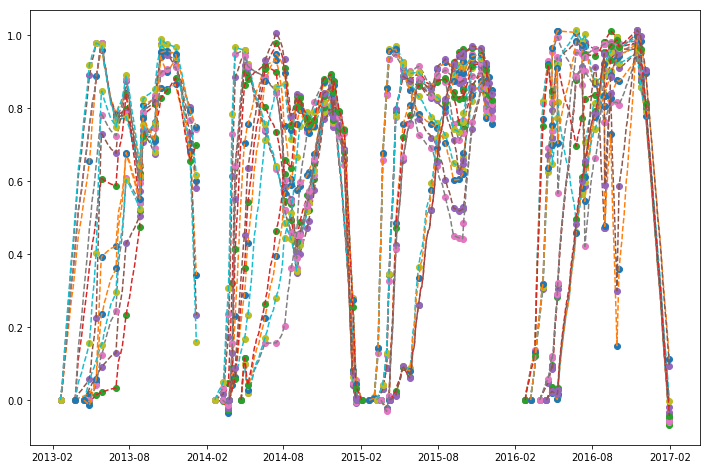

In [74]:
Graph = plt.figure(figsize=(12,8))
VarToInt = 'I/Io'#'NDVISC'
InterpolationIndex = pd.MultiIndex.from_product([YearList,TreatmentList,MetData.loc['2013-02-01':].index], names=['year', 'TrtNum', 'Date'])
BiomassAnalysis = pd.DataFrame(index = InterpolationIndex, columns=[VarToInt])
for Year in [2013,2014,2015,2016]:
    YearData = Data.loc[Data.YearSown==Year,:]
    YearIndex = GrandIndex.loc[Year,:].dropna(axis=1,how='all')
    for Treat in YearIndex.index:
        Filter = YearData.TrtNum == Treat
        TreatCover = YearData.loc[Filter,VarToInt].dropna().groupby(level='SampleDate').mean()
        plt.plot(TreatCover,'o')
        Dates = TreatCover.index
        ArrayTt = MetData.loc[Dates,'Tt']
        InterpDates = MetData.loc[Dates.min():Dates.max()].index
        dailyTt = MetData.loc[InterpDates,'Tt']
        InterpCover = np.interp(dailyTt,ArrayTt,TreatCover)
        TreatIndex = pd.MultiIndex.from_product([[Year],[Treat],InterpDates],names=['Year', 'TrtNum', 'Date'])
        InterpDF = pd.DataFrame(index = TreatIndex, data=InterpCover,columns=[VarToInt])
        plt.plot(InterpDates, InterpDF.loc[:,VarToInt],'--')
        BiomassAnalysis.update(InterpDF)

### Implement simple biomass model

In [75]:
BiomassAnalysis.dropna(inplace=True)
BiomassAnalysis.sort_index(inplace=True)
for Year in [2013,2014,2015,2016]:
    YearData = Data.loc[Data.YearSown==Year,:]
    YearIndex = GrandIndex.loc[Year,:].dropna(axis=1,how='all')
    for Treat in YearIndex.index:
        Rad = MetData.loc[BiomassAnalysis.loc[(Year,Treat),:].index,'Radn']
        Temp = MetData.loc[BiomassAnalysis.loc[(Year,Treat),:].index,'MeanT']
        BiomassAnalysis.loc[(Year,Treat),'Radn'] = Rad.values
        BiomassAnalysis.loc[(Year,Treat),'Temp'] = Temp.values
BiomassAnalysis.loc[:,'IntRadn'] = BiomassAnalysis.loc[:,VarToInt] * BiomassAnalysis.loc[:,'Radn']
XTemp = [-10,0,15,25,35]
YRUE = [0,0,15,15,0]
BiomassAnalysis.loc[:,'RUE'] = [np.interp(BiomassAnalysis.loc[x,'Temp'],XTemp,YRUE) for x in BiomassAnalysis.index]
BiomassAnalysis.loc[:,'PotDM'] = BiomassAnalysis.loc[:,'RUE'] * BiomassAnalysis.loc[:,'IntRadn']

TreatsWithIncompleteRadnData = [(2013,'1b'),(2013,'2b'),(2013,'3b'),
                               (2013,'1d'),(2013,'2d'),(2013,'3d'),
                                (2013,'2f'),
                               (2015,'4d')]
for Incomplete in TreatsWithIncompleteRadnData:
    BiomassAnalysis.loc[Incomplete,:] = np.nan

In [76]:
BiomassAnalysis

I/Io   Radn   Temp   IntRadn    RUE    PotDM
year TrtNum Date                                                         
2013 1a     2013-02-20          0  24.71  14.85         0  14.85        0
            2013-02-21  0.0101694  17.62  15.10  0.179186  15.00  2.68778
            2013-02-22  0.0180491  15.59  11.70  0.281385  11.70  3.29221
            2013-02-23  0.0254573  23.80  11.00  0.605883  11.00  6.66472
            2013-02-24  0.0334716  24.41  11.90  0.817042  11.90   9.7228
            2013-02-25  0.0445166  20.91  16.40  0.930842  15.00  13.9626
            2013-02-26  0.0570768  24.52  18.65   1.39952  15.00  20.9929
            2013-02-27  0.0692667  22.56  18.10   1.56266  15.00  23.4399
            2013-02-28  0.0822647  23.49  19.30    1.9324  15.00   28.986
            2013-03-01  0.0931413  18.77  16.15   1.74826  15.00  26.2239
            2013-03-02   0.104994  12.04  17.60   1.26413  15.00   18.962
            2013-03-03    0.11476  11.54  14.50   1.32433  14.50  19.2028
            2013-03-04   0.125165  15.49  15.45   1.93881  15.00  29.0821
            2013-03-05     0.1352  22.96  14.90   3.10419  14.90  46.2524
            2013-03-06   0.148972  14.65  20.45   2.18244  15.00  32.7367
            2013-03-07   0.158536  15.70  14.20   2.48901  14.20  35.3439
            2013-03-08   0.171635  21.90  19.45    3.7588  15.00   56.382
            2013-03-09   0.182545  13.33  16.20   2.43332  15.00  36.4999
            2013-03-10   0.192647   7.99  15.00   1.53925  15.00  23.0887
            2013-03-11   0.203018  16.74  15.40   3.39853  15.00  50.9779
            2013-03-12   0.213053  11.68  14.90   2.48846  14.90  37.0781
            2013-03-13   0.224671  17.46  17.25   3.92275  15.00  58.8412
            2013-03-14    0.23713  20.84  18.50   4.94179  15.00  74.1268
            2013-03-15   0.248343  12.57  16.65   3.12167  15.00  46.8251
            2013-03-16   0.259287   5.06  16.25   1.31199  15.00  19.6799
            2013-03-17   0.271174   8.71  17.65   2.36193  15.00  35.4289
            2013-03-18   0.280468   5.51  13.80   1.54538  13.80  21.3262
            2013-03-19   0.287977   7.82  11.15   2.25198  11.15  25.1096
            2013-03-20   0.295453  14.94  11.10   4.41406  11.10  48.9961
            2013-03-21   0.302996  19.53  11.20    5.9175  11.20   66.276
...                           ...    ...    ...       ...    ...      ...
2016 4d     2017-01-01   0.520857  31.80  24.50   16.5633  15.00  248.449
            2017-01-02   0.507361  14.00  15.20   7.10305  15.00  106.546
            2017-01-03   0.492311  15.80  16.95   7.77852  15.00  116.678
            2017-01-04   0.481568  15.00  12.10   7.22352  12.10  87.4045
            2017-01-05   0.472822  31.70   9.85   14.9885   9.85  147.636
            2017-01-06   0.457284  21.60  17.50   9.87733  15.00   148.16
            2017-01-07   0.445919  19.30  12.80   8.60623  12.80   110.16
            2017-01-08   0.432511  28.20  15.10   12.1968  15.00  182.952
            2017-01-09   0.420037  19.30  14.05   8.10671  14.05  113.899
            2017-01-10    0.40512  23.60  16.80   9.56083  15.00  143.412
            2017-01-11   0.386829  16.90  20.60   6.53742  15.00  98.0612
            2017-01-12   0.367473  26.30  21.80   9.66454  15.00  144.968
            2017-01-13   0.353977  31.20  15.20   11.0441  15.00  165.661
            2017-01-14   0.336752  21.40  19.40   7.20649  15.00  108.097
            2017-01-15   0.317662  32.00  21.50   10.1652  15.00  152.478
            2017-01-16    0.30239  24.10  17.20   7.28761  15.00  109.314
            2017-01-17   0.284411  31.20  20.25   8.87361  15.00  133.104
            2017-01-18   0.267985  10.10  18.50   2.70664  15.00  40.5997
            2017-01-19   0.252979  17.30  16.90   4.37654  15.00  65.6481
            2017-01-20   0.243345  25.80  10.85   6.27831  10.85  68.1197
            2017-01-21   0.231004  14.30  13.90   3.30335  13.90  45.9166
            2017-01-22   0.218484

## Graph Zadoc stage againts TT since sowing for 2014 where we have good data

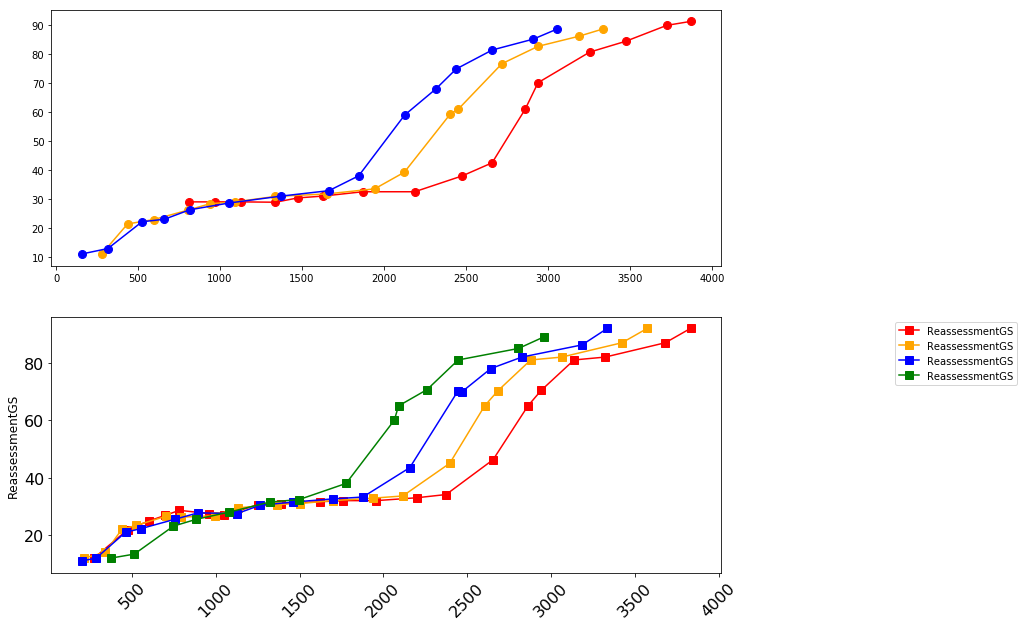

In [77]:
Variable = 'ReassessmentGS'
MakeThermalTimeCoarseGraph(Variable,[2013,2014])

## Following GS32 the sowing dates appear to have a similar pattern.  The differences in time to GS32 are related to final leaf number and these can be offset.  Lets look at leaf numbers first for 2014 where zadoc data is best

### First sow date had 17 leaves, then 15.5, 14.5, and 13 leaves for the final sow date.  All of these leaves will be appearing with a large phyllochron and this many phyllochrons can be removed to align the zadoc data post stage 32 for model fitting.

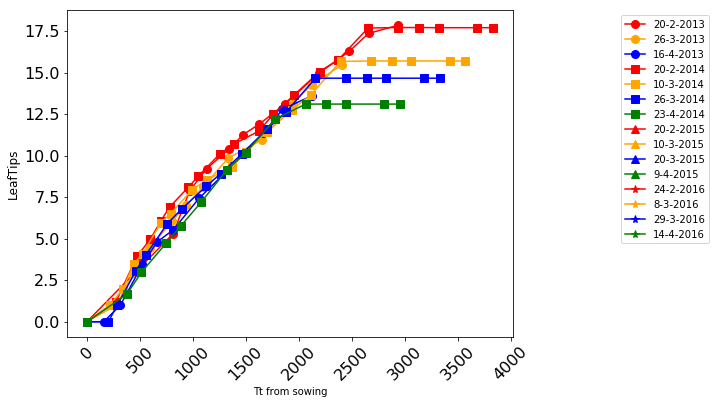

In [78]:
Colors = ['red','orange','blue','green']
Markers = ['o-','s-','^-','*-']
Sizes = [12,10,8,6,4,2]
Graph = plt.figure(figsize=(8,6))
YearPos = 0
for Year in YearList:
    filter = Data.loc[:,'YearSown'] == Year
    SowDates = pd.to_datetime(Data.loc[filter,'SowingDate'].drop_duplicates().values)
    TreatPos = 0
    for Treat in SowDates:
        Filter = (Data.YearSown == Year) & (Data.SowingDate == Treat) & (Data.Cultivar == 'Wakanui')  & ((Data.PlantPopn==200) | (Data.PlantPopn==50)) & (Data.PGRCanopyMgmtTrt == 'Normal')
        GraphData = pd.to_numeric(Data.loc[Filter,'NumLigules'].dropna()).groupby(level='SampleDate').mean()
        TtFromSow = pd.to_numeric(Data.loc[Filter,'TtFromSowing'].loc[GraphData.index].dropna()).groupby(level='SampleDate').mean()
        plt.plot(TtFromSow,GraphData,Markers[YearPos],color = Colors[TreatPos], markersize = 8,label = str(Treat.day)+'-'+str(Treat.month)+'-'+str(Treat.year))
        TreatPos +=1
    YearPos+=1
plt.xticks(rotation=45)
plt.ylabel('LeafTips',fontsize=12)
plt.xlabel('Tt from sowing')
plt.tick_params(labelsize=16)
plt.legend(bbox_to_anchor=(1.45, 1),numpoints=1)

In [79]:
for Year in YearList:
    filter = Data.loc[:,'YearSown'] == Year
    print(Data.loc[:,'YearSown'] == Year)

SampleDate
2013-11-19     True
2013-10-29     True
2013-10-29     True
2013-10-29     True
2013-10-29     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
2013-07-18     True
              ...  
2016-11-15    False
2016-11-15    False
2016-11-15    False
2016-11-15    False
2016-11-15    False
2016-11-15    False
2016-11-15    False
2016-11-15    False
2016-11-15    False
2016-11-15    False
2016-11-15    False
2016-11-15    False
2016-11-15    False
2016-11-15    False
2016-11-15    False
2016-11-15    False
2016-11-15    False
2016-11-15    False
2016-11-1

In [80]:
Data.loc[:,'YearSown']

SampleDate
2013-11-19    2013
2013-10-29    2013
2013-10-29    2013
2013-10-29    2013
2013-10-29    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
2013-07-18    2013
              ... 
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2016-11-15    2016
2

In [81]:
SowDates = pd.to_datetime(Data.loc[filter,'SowingDate'].drop_duplicates().values)
print(SowDates)

DatetimeIndex(['2016-02-24', '2016-03-08', '2016-03-29', '2016-04-14'], dtype='datetime64[ns]', freq=None)


In [82]:
Data.loc[filter,'SampleDate'].drop_duplicates().values

array([Timestamp('2016-10-03 00:00:00'), Timestamp('2016-07-14 00:00:00'),
       Timestamp('2016-05-10 00:00:00'), Timestamp('2016-09-28 00:00:00'),
       Timestamp('2016-08-08 00:00:00'), Timestamp('2016-12-05 00:00:00'),
       Timestamp('2016-11-23 00:00:00'), Timestamp('2016-04-28 00:00:00'),
       Timestamp('2017-01-30 00:00:00'), Timestamp('2016-04-27 00:00:00'),
       Timestamp('2016-06-23 00:00:00'), Timestamp('2016-11-15 00:00:00'),
       Timestamp('2016-07-07 00:00:00'), Timestamp('2016-05-11 00:00:00'),
       Timestamp('2016-08-29 00:00:00'), Timestamp('2016-09-13 00:00:00'),
       Timestamp('2016-10-20 00:00:00'), Timestamp('2016-03-18 00:00:00'),
       Timestamp('2016-04-18 00:00:00'), Timestamp('2016-08-30 00:00:00'),
       Timestamp('2016-04-06 00:00:00'), Timestamp('2017-01-31 00:00:00'),
       Timestamp('2017-01-12 00:00:00'), Timestamp('2016-11-28 00:00:00'),
       Timestamp('2016-07-28 00:00:00'), Timestamp('2017-02-10 00:00:00'),
       Timestamp('2016-12

In [83]:
for Year in YearList:
    filter = Data.loc[:,'YearSown'] == Year
    SowDates = pd.to_datetime(Data.loc[filter,'SowingDate'].drop_duplicates().values)
    TreatPos = 0
    for Treat in SowDates:
        Filter = (Data.YearSown == Year) & (Data.SowingDate == Treat) & (Data.Cultivar == 'Wakanui')  & ((Data.PlantPopn==200) | (Data.PlantPopn==50)) & (Data.PGRCanopyMgmtTrt == 'Normal')
        GraphData = pd.to_numeric(Data.loc[Filter,'NumLigules'].dropna()).groupby(level='SampleDate').mean()
        TtFromSow = pd.to_numeric(Data.loc[Filter,'TtFromSowing'].loc[GraphData.index].dropna()).groupby(level='SampleDate').mean()
        plt.plot(TtFromSow,GraphData,Markers[YearPos],color = Colors[TreatPos], markersize = 8,label = str(Treat.day)+'-'+str(Treat.month)+'-'+str(Treat.year))
        TreatPos +=1
    YearPos+=1

IndexError: list index out of range

In [84]:
Colors = ['red','orange','blue','green']
Markers = ['o-','s-','^-','*-']
Sizes = [12,10,8,6,4,2]
Graph = plt.figure(figsize=(8,6))
YearPos = 0
for Year in YearList:
    filter = Data.loc[:,'YearSown'] == Year
    SowDates = pd.to_datetime(Data.loc[filter,'SowingDate'].drop_duplicates().values)
    TreatPos = 0
    for Treat in SowDates:
        Filter = (Data.YearSown == Year) & (Data.SowingDate == Treat) & (Data.Cultivar == 'Wakanui')  & ((Data.PlantPopn==200) | (Data.PlantPopn==50)) & (Data.PGRCanopyMgmtTrt == 'Normal')
     #   GraphData = pd.to_numeric(Data.loc[Filter,'NumLigules'].dropna()).groupby(level='SampleDate').mean()
    #    TtFromSow = pd.to_numeric(Data.loc[Filter,'TtFromSowing'].loc[GraphData.index].dropna()).groupby(level='SampleDate').mean()
        #plt.plot(TtFromSow,GraphData,Markers[YearPos],color = Colors[TreatPos], markersize = 8,label = str(Treat.day)+'-'+str(Treat.month)+'-'+str(Treat.year))
    #    TreatPos +=1
    #YearPos+=1
#plt.xticks(rotation=45)
#plt.ylabel('LeafTips',fontsize=12)
#plt.xlabel('Tt from sowing')
#plt.tick_params(labelsize=16)
#plt.legend(bbox_to_anchor=(1.45, 1),numpoints=1)

In [85]:
pd.to_numeric(Data.NumLigules.dropna())

SampleDate
2013-11-19    18.0
2013-11-19    18.0
2013-11-19    19.0
2013-11-19    18.0
2013-11-19    18.0
2013-11-19    18.0
2013-11-19    17.0
2013-11-19    18.0
2013-11-19    17.0
2013-11-19    17.0
2013-11-19    17.0
2013-11-19    17.0
2013-11-19    18.0
2013-11-19    17.0
2013-11-19    17.0
2013-11-19    18.0
2013-11-19    18.0
2013-11-19    18.0
2013-11-19    17.0
2013-10-29    19.0
2013-11-19    17.0
2013-11-19    19.0
2013-11-19    17.0
2013-11-19    19.0
2013-11-19    17.0
2013-11-19    18.0
2013-11-19    18.0
2013-11-19    17.0
2013-11-19    18.0
2013-10-29    16.0
              ... 
2016-08-08     7.0
2016-08-08     7.0
2016-08-08     7.0
2016-08-08     7.0
2016-08-08     6.0
2016-08-08     7.0
2016-08-08     7.0
2016-08-08     7.0
2016-08-08     7.0
2016-08-08     7.0
2016-08-08     7.0
2016-08-08     7.0
2016-08-08     6.0
2016-08-08     7.0
2016-08-08     7.0
2016-08-08     7.0
2016-08-08     6.0
2016-08-08     7.0
2016-07-14     5.0
2016-08-08     7.0
2017-01-31     2.0
2

In [86]:
Data.loc[Filter,'NumLigules'].dropna()

Series([], Name: NumLigules, dtype: float64)

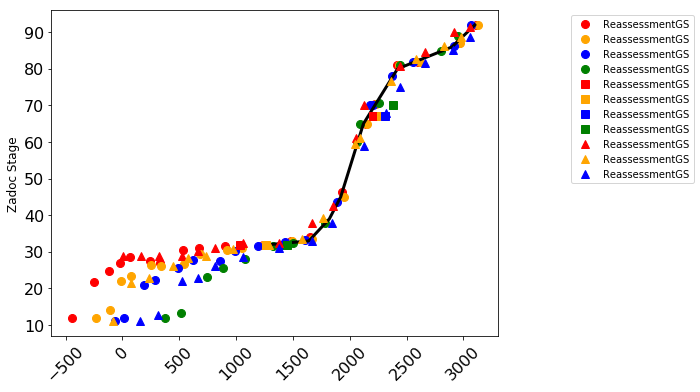

In [87]:
Colors = ['red','orange','blue','green']
phyllochron = 180
ExtraLeaves = [4,2.5,1.5,0]
Offsets = np.multiply(ExtraLeaves,phyllochron)
Graph = plt.figure(figsize=(8,6))
YearPos = 0
filter = Data.loc[:,'YearSown'] == 2014
SowDates = pd.to_datetime(Data.loc[filter,'SowingDate'].drop_duplicates().values)
TreatPos = 0
for Treat in SowDates:
    Filter = (Data.YearSown == 2014) & (Data.SowingDate == Treat) 
    GraphData = pd.to_numeric(Data.loc[Filter,'ReassessmentGS'].dropna()).groupby(level='SampleDate').mean()
    TtFromSow = pd.to_numeric(Data.loc[Filter,'TtFromSowing'].loc[GraphData.index].dropna()).groupby(level='SampleDate').mean() 
    TtFrom32 = np.subtract(TtFromSow, Offsets[TreatPos])
    plt.plot(TtFrom32,GraphData,'o',color = Colors[TreatPos], markersize = 8)
    TreatPos +=1
YearPos+=1
plt.xticks(rotation=45)
plt.ylabel('Zadoc Stage',fontsize=12)
plt.tick_params(labelsize=16)
plt.legend(bbox_to_anchor=(1.45, 1),numpoints=1)

#Model to quantify development post GS32
OffsetTtSowing = [1300, 1640, 1820, 1920, 2120, 2420, 2900, 3100]
Zstage = [32, 33, 39, 45, 65, 80, 86, 92]

plt.plot(OffsetTtSowing,Zstage,'-',color='k',Linewidth=3)

ExtraLeaves = [4,2.5,1.5,0]
Offsets = np.multiply(ExtraLeaves,phyllochron)
YearPos = 0
filter = Data.loc[:,'YearSown'] == 2015
SowDates = pd.to_datetime(Data.loc[filter,'SowingDate'].drop_duplicates().values)
TreatPos = 0
for Treat in SowDates:
    Filter = (Data.YearSown == 2015) & (Data.SowingDate == Treat) 
    GraphData = pd.to_numeric(Data.loc[Filter,'ReassessmentGS'].dropna()).groupby(level='SampleDate').mean()
    TtFromSow = pd.to_numeric(Data.loc[Filter,'TtFromSowing'].loc[GraphData.index].dropna()).groupby(level='SampleDate').mean() 
    TtFrom32 = np.subtract(TtFromSow, Offsets[TreatPos])
    plt.plot(TtFrom32,GraphData,'s',color = Colors[TreatPos], markersize = 8)
    TreatPos +=1
YearPos+=1
plt.xticks(rotation=45)
plt.tick_params(labelsize=16)
plt.legend(bbox_to_anchor=(1.45, 1),numpoints=1)

ExtraLeaves = [4.5,2,0]
Offsets = np.multiply(ExtraLeaves,phyllochron)
YearPos = 0
filter = Data.loc[:,'YearSown'] == 2013
SowDates = pd.to_datetime(Data.loc[filter,'SowingDate'].drop_duplicates().values)
TreatPos = 0
for Treat in SowDates:
    Filter = (Data.YearSown == 2013) & (Data.SowingDate == Treat) 
    GraphData = pd.to_numeric(Data.loc[Filter,'ReassessmentGS'].dropna()).groupby(level='SampleDate').mean()
    TtFromSow = pd.to_numeric(Data.loc[Filter,'TtFromSowing'].loc[GraphData.index].dropna()).groupby(level='SampleDate').mean() 
    TtFrom32 = np.subtract(TtFromSow, Offsets[TreatPos])
    plt.plot(TtFrom32,GraphData,'^',color = Colors[TreatPos], markersize = 8)
    TreatPos +=1
YearPos+=1
plt.xticks(rotation=45)
plt.tick_params(labelsize=16)
plt.legend(bbox_to_anchor=(1.45, 1),numpoints=1)

### Now we have a model to interpolate zadox stage from a given date, package it into a data frame

In [88]:
OffsetTtSowing = [1300, 1640, 1820, 1920, 2120, 2420, 2900, 3100]
Zstage = [32, 33, 39, 45, 65, 80, 86, 92]
Post32ZadocModel = pd.DataFrame(columns = ['TTsinceGS32','Zstage'])
Post32ZadocModel.TTsinceGS32 = np.subtract(OffsetTtSowing,OffsetTtSowing[0])
Post32ZadocModel.Zstage = Zstage

In [89]:
Post32ZadocModel

,TTsinceGS32,Zstage
0,0,32
1,340,33
2,520,39
3,620,45
4,820,65
5,1120,80
6,1600,86
7,1800,92


# Make a dataframe with indexing needed for doing harvest summary and determine crop specific variables

In [90]:
Index = ['YearSown','SowingDate','Cultivar','PlantPopn','PGRCanopyMgmtTrt']
IndexedData = Data.loc[Data.PlantPopn != '100f',:].set_index(Index,drop=False)
IndexedData.sort_index(inplace=True)
#Make filters for selecting specific sample timings
GS32Filter = (IndexedData.loc[:,'SampleGS']=='GS32').values
GS65Filter = (IndexedData.loc[:,'SampleGS']=='GS65').values
GS90Filter = (IndexedData.loc[:,'SampleGS']=='GS90').values
#Calculate Anthesis parameters
IndexedData.loc[GS90Filter,'AnthesisStem'] = IndexedData.loc[GS65Filter,'StemBiomass']
IndexedData.loc[GS90Filter, 'AnthesisBiomass'] = IndexedData.loc[GS65Filter,'TotalBiomass']                                     
IndexedData.loc[GS90Filter,'GrainsPerGramStem'] = IndexedData.loc[GS90Filter,'GrainsMSq']/(IndexedData.loc[GS65Filter,'StemBiomass']/10)
IndexedData.loc[GS90Filter,'1000GrainWt0Pc'] = IndexedData.loc[GS90Filter,'ThousandGrainWeight'] * (100-IndexedData.loc[GS90Filter,'GrainMoisture'])/100

In [91]:
Data.loc[Data.PlantPopn != '100f',:]

,TrialCode,YearSown,Farmer,Location,Plot,TrialCodePlot,TrtNum,Block,Cultivar,SowingDate,...,NDVISCNDVImax,NDVISCNDVIsoil,NDVI,NDVIHC,WDVI,NDVISC,I/Io,TTAtSow,TtAtSample,TtFromSowing
SampleDate,,,,,,,,,,,,,,,,,,,,,
2013-11-19,Bir13,2013,David Birkett,Leeston,209,Bir13-209,1e,2,Wakanui,2013-02-20 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.904417,115024.962678,117964.312678,2939.35
2013-10-29,Bir13,2013,David Birkett,Leeston,119,Bir13-119,1c,1,Wakanui,2013-02-20 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.871607,115024.962678,117683.962678,2659.00
2013-10-29,Bir13,2013,David Birkett,Leeston,119,Bir13-119,1c,1,Wakanui,2013-02-20 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.947645,115024.962678,117683.962678,2659.00
2013-10-29,Bir13,2013,David Birkett,Leeston,212,Bir13-212,1c,2,Wakanui,2013-02-20 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.897792,115024.962678,117683.962678,2659.00
2013-10-29,Bir13,2013,David Birkett,Leeston,212,Bir13-212,1c,2,Wakanui,2013-02-20 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.976773,115024.962678,117683.962678,2659.00
2013-07-18,Bir13,2013,David Birkett,Leeston,403,Bir13-403,1a,4,Wakanui,2013-02-20 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115024.962678,116652.712678,1627.75
2013-07-18,Bir13,2013,David Birkett,Leeston,303,Bir13-303,1a,3,Wakanui,2013-02-20 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115024.962678,116652.712678,1627.75
2013-07-18,Bir13,2013,David Birkett,Leeston,302,Bir13-302,1e,3,Wakanui,2013-02-20 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115024.962678,116652.712678,1627.75
2013-07-18,Bir13,2013,David Birkett,Leeston,301,Bir13-301,1c,3,Wakanui,2013-02-20 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115024.962678,116652.712678,1627.75


In [92]:
IndexedData.loc[:,'SampleGS']=='GS32'

YearSown  SowingDate  Cultivar  PlantPopn  PGRCanopyMgmtTrt
2013      2013-02-20  Wakanui   50         Normal              False
                                           Normal              False
                                           Normal              False
                                           Normal              False
                                           Normal              False
                                           Normal              False
                                           Normal              False
                                           Normal              False
                                           Normal              False
                                           Normal              False
                                           Normal              False
                                           Normal              False
                                           Normal              False
                                           

## Determine exact dates for GS32, 65 and 90 from the Zadoc Tt model defined above

In [93]:
TTat40 = np.interp(39,Post32ZadocModel.Zstage,Post32ZadocModel.TTsinceGS32) # added for 300dd before anthesis
TTat65 = np.interp(65,Post32ZadocModel.Zstage,Post32ZadocModel.TTsinceGS32)
TTat90 = np.interp(90,Post32ZadocModel.Zstage,Post32ZadocModel.TTsinceGS32)
TT65to90 = TTat90 - TTat65
TT40to65 = TTat65 - TTat40 #added for 300dd assessment and this equals 300!
for plot in IndexedData.loc[GS65Filter].index:
    GSAtSample = IndexedData.loc[GS65Filter].loc[plot].ReassessmentGS.mean()
    TTatObsDate = np.interp(GSAtSample,Post32ZadocModel.Zstage,Post32ZadocModel.TTsinceGS32)
    TTAdjust = TTat65 - TTatObsDate
    TTSowTo65 = TTAdjust + IndexedData.loc[GS65Filter].loc[plot].TtFromSowing.mean()
    TTSowTo90 = TTSowTo65 + TT65to90
    TTSowTo32 = TTSowTo65 - TTat65
    TTSowTo40 = TTSowTo65 - TT40to65 #added for 300dd before anthesis #FIXME: not correct?
    AccumTTatSow = IndexedData.loc[GS65Filter].loc[plot].TTAtSow.mean()
    AccumTTat32 = AccumTTatSow + TTSowTo32
    AccumTTat65 = AccumTTatSow + TTSowTo65
    AccumTTat90 = AccumTTatSow + TTSowTo90
    AccumTTat40 = AccumTTatSow + TTSowTo40 #added for 300dd before anthesis
    Filter = MetData.Tt == min(MetData.Tt, key=lambda x:abs(x-AccumTTat32))
    IndexedData.loc[plot,'GS32'] = MetData.loc[Filter].index[0]
    Filter = MetData.Tt == min(MetData.Tt, key=lambda x:abs(x-AccumTTat65))
    IndexedData.loc[plot,'GS65'] = MetData.loc[Filter].index[0]
    Filter = MetData.Tt == min(MetData.Tt, key=lambda x:abs(x-AccumTTat90))
    IndexedData.loc[plot,'GS90'] = MetData.loc[Filter].index[0]
    Filter = MetData.Tt == min(MetData.Tt, key=lambda x:abs(x-AccumTTat40)) #added for 300dd before anthesis
    IndexedData.loc[plot,'GS40'] = MetData.loc[Filter].index[0] #added for 300dd before anthesis

In [94]:
TT40to65
TTSowTo65

2306.2000000000116

### Calculate stage specific met variables

In [95]:
for Year in YearList:
    for Treat in TreatmentList:
        try:
            StartWinter = dt.datetime(Year,5,1)
            filter = (IndexedData.TrtNum == Treat) & (IndexedData.YearSown == Year)
            SowDate = IndexedData.loc[filter,'SowingDate'].dropna().drop_duplicates()[0]
            GS32Date = IndexedData.loc[filter,'GS32'].dropna().drop_duplicates()[0]
            GS40Date = IndexedData.loc[filter,'GS40'].dropna().drop_duplicates()[0] #added for 300dd anthesis
            # GS40Date = ? how to set this when it's not a filter in IndexedData?
            GS65Date = IndexedData.loc[filter,'GS65'].dropna().drop_duplicates()[0]
            GS90Date = IndexedData.loc[filter,'GS90'].dropna().drop_duplicates()[0]
            RadInt = BiomassAnalysis.loc[(Year,Treat)].loc[SowDate:GS32Date].IntRadn.sum()
            Temp = BiomassAnalysis.loc[(Year,Treat)].loc[SowDate:GS32Date].Temp.mean()
            TempSum = BiomassAnalysis.loc[(Year,Treat)].loc[SowDate:GS32Date].Temp.sum()
            IndexedData.loc[filter,'VegRadn'] = RadInt
            IndexedData.loc[filter,'VegTemp'] = Temp
            IndexedData.loc[filter,'VegPTQ'] = RadInt/TempSum
            RadInt = BiomassAnalysis.loc[(Year,Treat)].loc[GS32Date:GS65Date].IntRadn.sum()
            Temp = BiomassAnalysis.loc[(Year,Treat)].loc[GS32Date:GS65Date].Temp.mean()
            TempSum = BiomassAnalysis.loc[(Year,Treat)].loc[GS32Date:GS65Date].Temp.sum()
            IndexedData.loc[filter,'GrainDevRadn'] = RadInt
            IndexedData.loc[filter,'GrainDevTemp'] = Temp
            IndexedData.loc[filter,'GrainDevPTQ'] = RadInt/TempSum
            RadInt = BiomassAnalysis.loc[(Year,Treat)].loc[GS65Date:GS90Date].IntRadn.sum()
            Temp = BiomassAnalysis.loc[(Year,Treat)].loc[GS65Date:GS90Date].Temp.mean()
            TempSum = BiomassAnalysis.loc[(Year,Treat)].loc[GS65Date:GS90Date].Temp.sum()
            IndexedData.loc[filter,'GrainFillRadn'] = RadInt
            IndexedData.loc[filter,'GrainFillTemp'] = Temp
            IndexedData.loc[filter,'GrainFillPTQ'] = RadInt/TempSum
            RadInt = BiomassAnalysis.loc[(Year,Treat)].loc[StartWinter:GS32Date].IntRadn.sum()
            Radn = MetData.Radn.loc[StartWinter:GS32Date].sum()
            Temp = MetData.MeanT.loc[StartWinter:GS32Date].mean()
            Rain = MetData.Rain.loc[StartWinter:GS32Date].sum()
            IndexedData.loc[filter,'WinterRadn'] = RadInt
            IndexedData.loc[filter,'WinterRadnTot'] = Radn
            IndexedData.loc[filter,'WinterTemp'] = Temp
            IndexedData.loc[filter,'WinterRain'] = Rain
            # create new parameters for 300 dd before anthesis (aka GS40-GS65)
            RadInt = BiomassAnalysis.loc[(Year,Treat)].loc[GS40Date:GS65Date].IntRadn.sum()
            Temp = BiomassAnalysis.loc[(Year,Treat)].loc[GS40Date:GS65Date].Temp.mean()
            TempSum = BiomassAnalysis.loc[(Year,Treat)].loc[GS40Date:GS65Date].Temp.sum()
            IndexedData.loc[filter,'PTQ300Radn'] = RadInt
            IndexedData.loc[filter,'PTQ300Temp'] = Temp
            IndexedData.loc[filter,'PTQ300PTQ'] = RadInt/TempSum
        except:
            print(str(Year)+' '+str(Treat))
        

2013 1d
2013 1b
2013 2f
2013 2d
2013 2b
2013 3b
2013 3d
2013 4a
2013 4d
2013 4b
2013 4c
2014 2e
2014 1e
2014 3e
2014 2f
2015 2e
2015 1e
2015 3e
2015 2c
2015 1c
2015 3c
2015 1d
2015 2f
2015 2d
2015 3d
2015 4d
2015 4c
2016 2e
2016 1e
2016 3e
2016 2f
2016 3d


In [96]:
IndexedData.columns

Index(['TrialCode', 'YearSown', 'Farmer', 'Location', 'Plot', 'TrialCodePlot',
       'TrtNum', 'Block', 'Cultivar', 'SowingDate', 'PlantPopn', 'PGRTrt',
       'PGRTiming', 'PGRCanopyMgmtTrt', 'NTrt', 'SampleDate', 'ApproxGS',
       'SampleGS', 'ReassessmentGS', 'PlantNum', 'LeafNum', 'NumLeafTips',
       'NumLigules', 'ttFeb', 'ttMar', 'ttApr', 'LeafPositionNum',
       'LeafPosition', 'AvLeafSize', 'AvLeafWeight', 'AvSLA',
       'PercentSenescence', 'NumGreenLeaves', 'NumSenescingLeaves',
       'NumDeadLeaves', 'TotalBiomass', 'Grain0Percent', 'Grain14Percent',
       'StrawBiomass', 'StemBiomass', 'EarBiomass', 'ChaffBiomass',
       'TotalLeafBiomass', 'GreenLeafBiomass', 'DeadLeafBiomass',
       'GreenLeafStemRatio', 'AvStemLength', 'AvStemDW', 'StemsMSq', 'EarsMSq',
       'GrainsMSq', 'GrainsEar', 'HI', 'GrainMoisture', 'ThousandGrainWeight',
       'HectolitreGrainWeight', 'IndividGrainWt14Percent', 'LAI',
       'CorrLightInterception', 'CorrLAI', 'RED', 'NIR', 'NDVIHCSo

c:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  exec(code_obj, self.user_global_ns, self.user_ns)


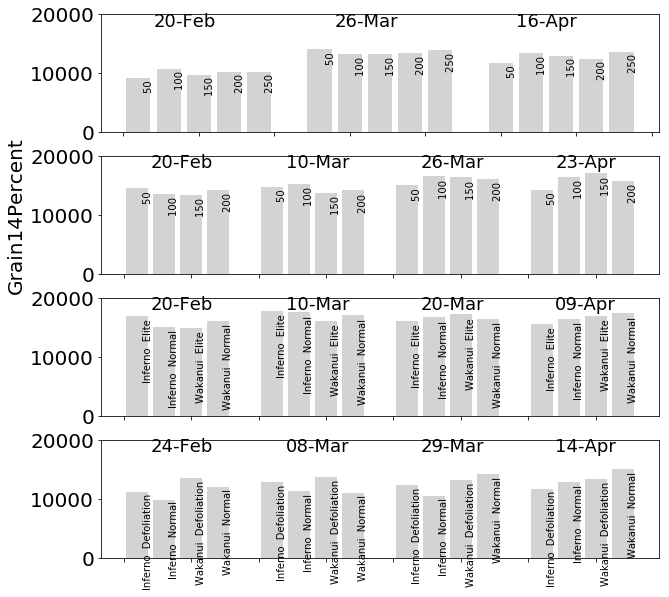

In [97]:
Variable = 'Grain14Percent'
Graph = plt.figure(figsize=(10,10))
pos=1
TreatInLabel = pd.Series(index = YearList, data = [[1],[1],[0,2],[0,2]])
Yup = FindAxisMax(IndexedData.loc[:,Variable ])
for Year in YearList:
    Pannel = Graph.add_subplot(len(YearList),1,pos)
    plt.ylim(0,Yup)
    plt.tick_params(labelsize=20)
    Pannel.tick_params(labelbottom='off')
    if Year == 2014:
        plt.ylabel(Variable, fontsize = 20)
    GraphData = pd.to_numeric(IndexedData[GS90Filter].loc[Year,Variable].dropna())
    MeanData = GraphData.groupby(GraphData.index).mean()
    Left = 0
    count = 0
    LastSowIndex = MeanData.index[count][0]
    for Treat in MeanData.index:
        SowLab = MeanData.index[count][0].to_datetime().strftime('%d-%b')
        if count == 0:
            plt.text(Left+1,Yup*0.9,SowLab,fontsize=18)
        if LastSowIndex != MeanData.index[count][0]:
            Left+=1
            plt.text(Left+1,Yup*0.9,SowLab,fontsize=18)
        plt.bar(left=Left+.5,height=MeanData[count],color='lightgrey')
        FullLab = MeanData.index[count][1:]
        forShort = TreatInLabel[Year]
        LabMembers = [FullLab[i] for i in forShort]
        Label = ''
        for member in LabMembers:
            Label += str(member)
            Label += '  '
        height = MeanData[count] * 0.95
        plt.text(Left+.7,height, Label,rotation=90, fontsize=10)
        Left += 1
        LastSowIndex = MeanData.index[count][0]
        count += 1
    pos +=1

## Time series graph

(0, 1)

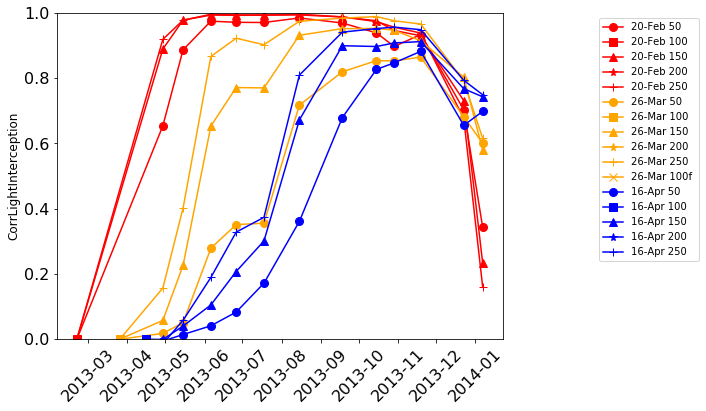

In [98]:
Year = 2013
Variable = 'CorrLightInterception'
MakeTimeCoarseGraph(Year,Variable)
plt.ylim(0,1)

(0, 1)

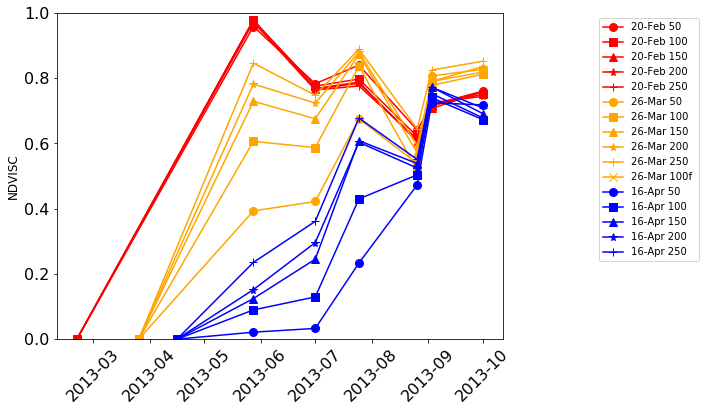

In [99]:
Year = 2013
Variable = 'NDVISC'
MakeTimeCoarseGraph(Year,Variable)
plt.ylim(0,1)

## Biomass model graph

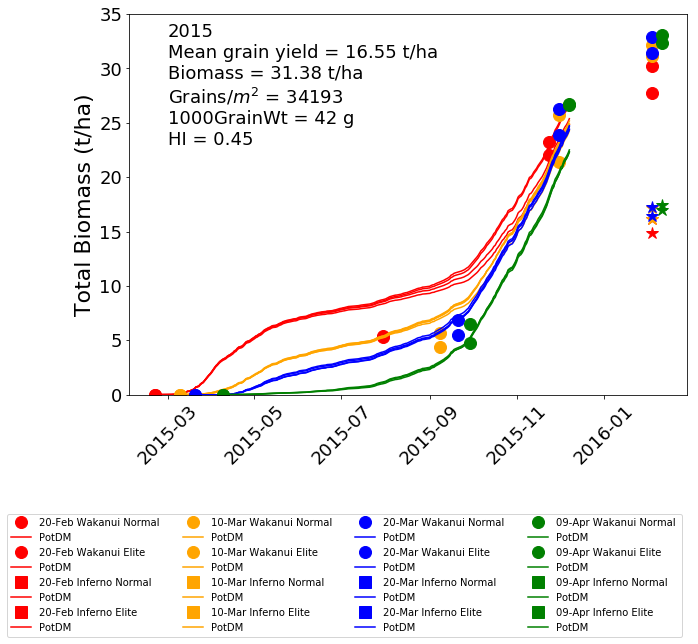

In [100]:
Year = 2015
GraphData = Data.loc[Data.YearSown==Year]
GraphTreats = MakeYearIndex(Year)
for var in GraphTreats.columns:
        LevelList = GraphTreats.loc[:,var].drop_duplicates().values
        if LevelList.size <= 1:
            GraphTreats.drop(var,axis=1,inplace=True)
Demarkers = SetSymbols(GraphTreats)
Graph = plt.figure(figsize=(10,7))

for Treat in GraphTreats.index:
    Filter = (Data.YearSown == Year) & (Data.TrtNum == Treat) & (Data.Cultivar == 'Wakanui')
    GraphData = Data.loc[Filter,'TotalBiomass'].dropna().groupby(level='SampleDate').mean()/1000
    col = Demarkers[0][GraphTreats.loc[Treat][0]]
    mark = Demarkers[1][GraphTreats.loc[Treat][1]]
    plt.plot(GraphData,mark,color = col, markersize = 12,label = MakeLabel(GraphTreats.loc[Treat,:]))
    Potbiomass = BiomassAnalysis.loc[(Year,Treat),'PotDM'].cumsum()
    plt.plot(Potbiomass/1000,'-', color=col)
    try:
        YieldData = Data.loc[Filter,'Grain14Percent'].dropna().mean()/1000
        Date =  Data.loc[Filter,'Grain14Percent'].dropna().index[0]
        plt.plot(Date,YieldData,'*',color = col, markersize = 12)
    except:
        fail = 'yes'
MeanYield = Data.loc[(Data.YearSown == Year)&(Data.Cultivar == 'Wakanui'),'Grain14Percent'].dropna().mean()/1000
MeanBiomass = Data.loc[(Data.YearSown == Year)&(Data.Cultivar == 'Wakanui')&(Data.SampleGS=='GS90'),'TotalBiomass'].dropna().mean()/1000
MeanGrainSize = IndexedData.loc[(IndexedData.YearSown == Year)&(IndexedData.Cultivar == 'Wakanui'),'1000GrainWt0Pc'].dropna().mean()
MeanGrainNumber = Data.loc[(Data.YearSown == Year)&(Data.Cultivar == 'Wakanui'),'GrainsMSq'].dropna().mean()
MeanHI = Data.loc[(Data.YearSown == Year)&(Data.Cultivar == 'Wakanui'),'HI'].dropna().mean()
PlotDate = dt.datetime(Year,3,1)
plt.text(PlotDate,23,str(Year)+'\nMean grain yield = '+'%.2f'%MeanYield + ' t/ha'+
         '\n'+ 'Biomass = ' + '%.2f'%MeanBiomass + ' t/ha' +
         '\n'+ r'Grains/$m^2$ = '+'%.0f'%MeanGrainNumber +
         '\n'+ '1000GrainWt = ' + '%.0f'%MeanGrainSize + ' g'+
         '\n'+ 'HI = '+ '%.2f'%MeanHI,fontsize=18)
plt.legend(bbox_to_anchor=(1, -0.3),numpoints=1,ncol=4)
plt.xticks(rotation=45)
plt.ylim(0,35)
plt.tick_params(labelsize=18)
plt.ylabel('Total Biomass (t/ha)',fontsize=22)

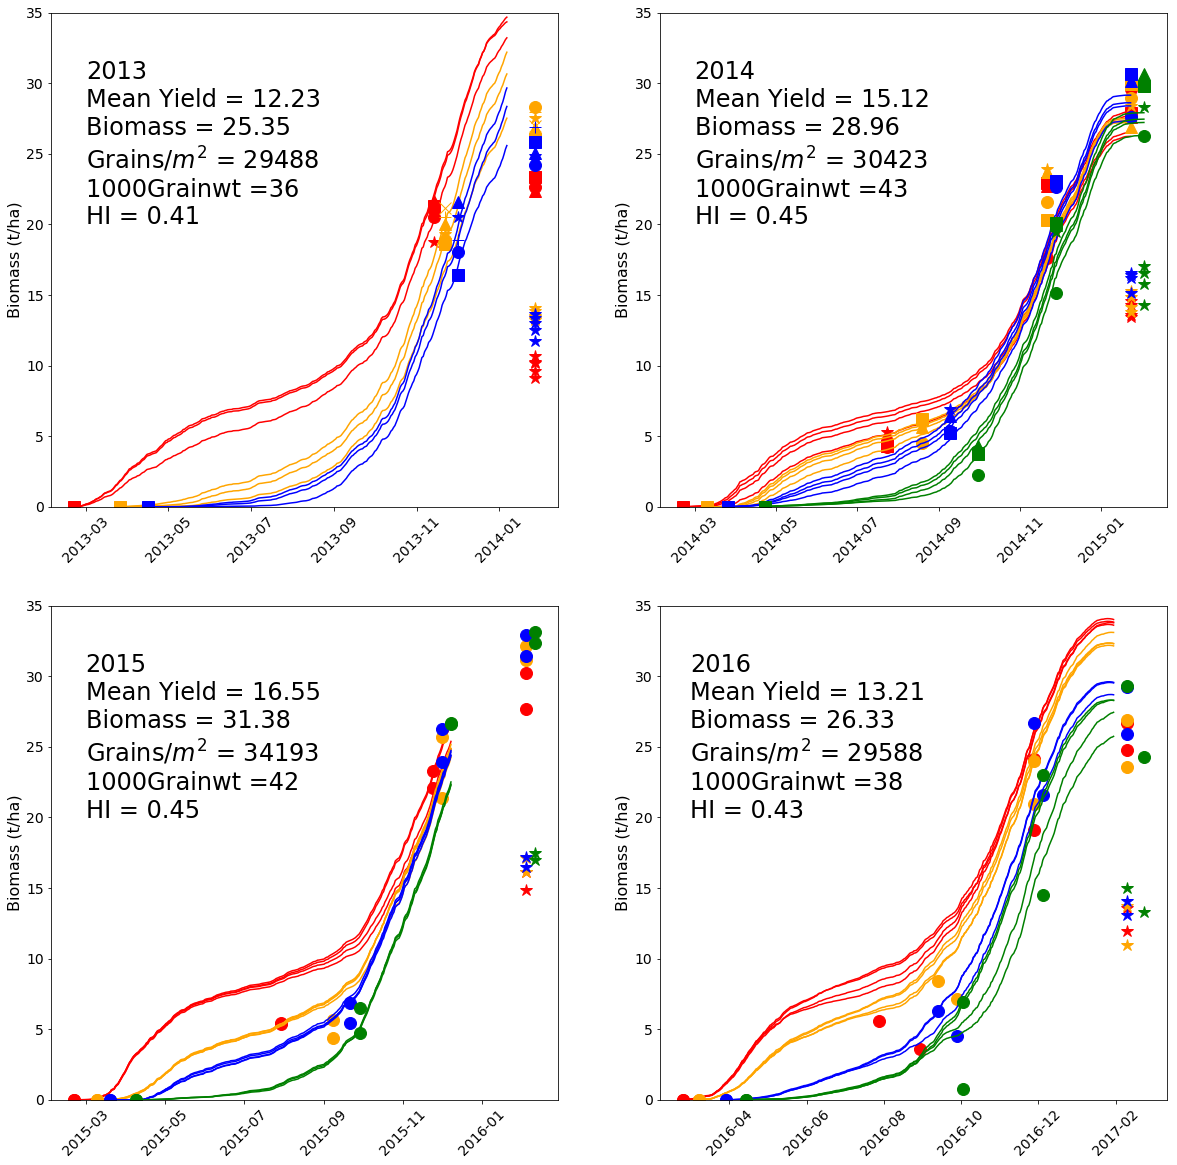

In [101]:
Graph = plt.figure(figsize=(20,20))
Pos =1
for Year in YearList:
    Graph.add_subplot(2,2,Pos)
    GraphData = Data.loc[Data.YearSown==Year]
    GraphTreats = MakeYearIndex(Year)
    for var in GraphTreats.columns:
        LevelList = GraphTreats.loc[:,var].drop_duplicates().values
        if LevelList.size <= 1:
            GraphTreats.drop(var,axis=1,inplace=True)
    Demarkers = SetSymbols(GraphTreats)
    for Treat in GraphTreats.index:
        Filter = (Data.YearSown == Year) & (Data.TrtNum == Treat) & (Data.Cultivar == 'Wakanui')
        GraphData = Data.loc[Filter,'TotalBiomass'].dropna().groupby(level='SampleDate').mean()/1000
        col = Demarkers[0][GraphTreats.loc[Treat][0]]
        mark = Demarkers[1][GraphTreats.loc[Treat][1]]
        plt.plot(GraphData,mark,color = col, markersize = 12,label = MakeLabel(GraphTreats.loc[Treat,:]))
        Potbiomass = BiomassAnalysis.loc[(Year,Treat),'PotDM'].cumsum()
        plt.plot(Potbiomass/1000,'-', color=col)
        try:
            YieldData = Data.loc[Filter,'Grain14Percent'].dropna().mean()/1000
            Date =  Data.loc[Filter,'Grain14Percent'].dropna().index[0]
            plt.plot(Date,YieldData,'*',color = col, markersize = 12)
        except:
            fail = 'yes'
    MeanYield = Data.loc[(Data.YearSown == Year)&(Data.Cultivar == 'Wakanui'),'Grain14Percent'].dropna().mean()/1000
    MeanBiomass = Data.loc[(Data.YearSown == Year)&(Data.Cultivar == 'Wakanui')&(Data.SampleGS=='GS90'),'TotalBiomass'].dropna().mean()/1000
    MeanGrainSize = IndexedData.loc[(IndexedData.YearSown == Year)&(IndexedData.Cultivar == 'Wakanui'),'1000GrainWt0Pc'].dropna().mean()
    MeanGrainNumber = Data.loc[(Data.YearSown == Year)&(Data.Cultivar == 'Wakanui'),'GrainsMSq'].dropna().mean()
    MeanHI = Data.loc[(Data.YearSown == Year)&(Data.Cultivar == 'Wakanui'),'HI'].dropna().mean()
    PlotDate = dt.datetime(Year,3,1)
    plt.text(PlotDate,20,str(Year)+'\nMean Yield = '+'%.2f'%MeanYield +
             '\n'+ 'Biomass = ' + '%.2f'%MeanBiomass +
             '\n'+ r'Grains/$m^2$ = '+'%.0f'%MeanGrainNumber +
             '\n'+ '1000Grainwt =' + '%.0f'%MeanGrainSize +
             '\n'+ 'HI = '+ '%.2f'%MeanHI,fontsize=24)
    Pos +=1
    plt.xticks(rotation=45)
    plt.ylim(0,35)
    plt.tick_params(labelsize=14)
    plt.ylabel('Biomass (t/ha)',fontsize=16)

## Harvest Graph

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  


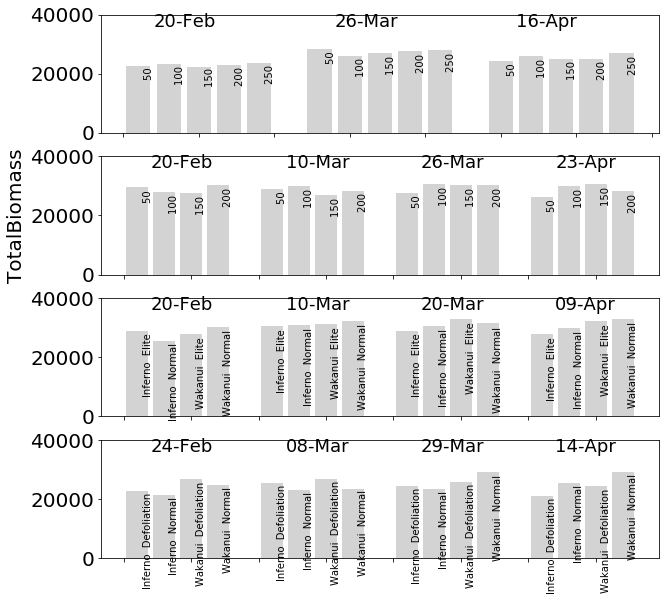

In [102]:
Variable = 'TotalBiomass'
MakeHarvestVariableGraph(Variable)

## Harvest correlations

In [103]:
['GrainsMSq','EarsMSq','StemsMSq','GrainsEar','1000GrainWt0Pc','GrainsPerGramStem',
 'TotalBiomass','HI','StemBiomass','StemBiomass','AnthesisBiomass','AnthesisStem']

['GrainsMSq',
 'EarsMSq',
 'StemsMSq',
 'GrainsEar',
 '1000GrainWt0Pc',
 'GrainsPerGramStem',
 'TotalBiomass',
 'HI',
 'StemBiomass',
 'StemBiomass',
 'AnthesisBiomass',
 'AnthesisStem']

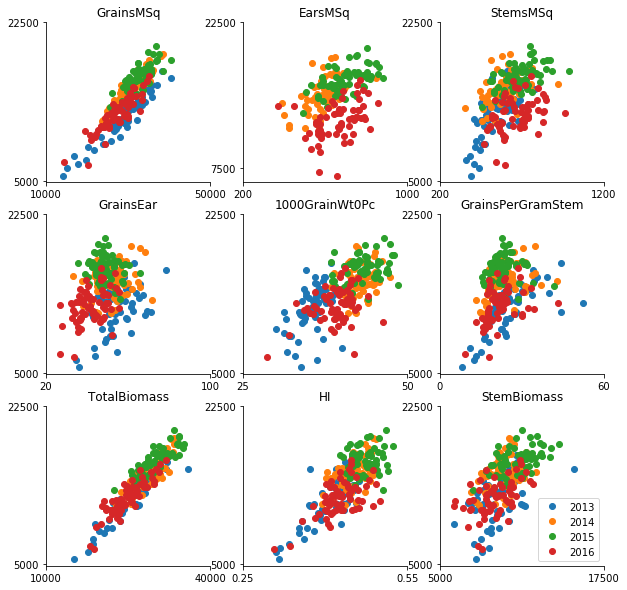

In [104]:
YVariable = 'Grain14Percent'
ComponentPairs = [['GrainsMSq',YVariable],
                  ['EarsMSq',YVariable],
                  ['StemsMSq',YVariable],
                  ['GrainsEar',YVariable],
                  ['1000GrainWt0Pc',YVariable],
                  ['GrainsPerGramStem',YVariable],
                  ['TotalBiomass',YVariable],
                  ['HI',YVariable],
                  ['StemBiomass',YVariable]]
Graph = plt.figure(figsize=(10,10))
pos = 1
for Component in ComponentPairs:
    Ax = Graph.add_subplot(3,3,pos)
    Ax.spines['right'].set_visible(False)
    Ax.spines['top'].set_visible(False)
    plt.tick_params(axis='x', which='both', bottom='on',top='off', labelbottom='on')
    plt.tick_params(axis='y', which='both', left='on',right='off', labelbottom='on')
    for Year in YearList:
        XData = IndexedData.loc[Year,Component[0]]
        YData = IndexedData.loc[Year,Component[1]]
        plt.plot(XData,YData,'o',label=Year)
        #plt.ylabel(Component[1])
        plt.title(Component[0])
    Ax.set_xticks([Ax.get_xticks()[0],Ax.get_xticks()[-1]])
    Ax.set_yticks([Ax.get_yticks()[1],Ax.get_yticks()[-1]])
    #Ax.set_xticklabels(['Less','More'])
    #Ax.set_yticklabels(['Modest','Jolly Good'])
    if pos == 9:
        plt.legend(loc=0,numpoints=1)
    pos+=1

## Met data variables

In [105]:
IndexedData.columns

Index(['TrialCode', 'YearSown', 'Farmer', 'Location', 'Plot', 'TrialCodePlot',
       'TrtNum', 'Block', 'Cultivar', 'SowingDate', 'PlantPopn', 'PGRTrt',
       'PGRTiming', 'PGRCanopyMgmtTrt', 'NTrt', 'SampleDate', 'ApproxGS',
       'SampleGS', 'ReassessmentGS', 'PlantNum', 'LeafNum', 'NumLeafTips',
       'NumLigules', 'ttFeb', 'ttMar', 'ttApr', 'LeafPositionNum',
       'LeafPosition', 'AvLeafSize', 'AvLeafWeight', 'AvSLA',
       'PercentSenescence', 'NumGreenLeaves', 'NumSenescingLeaves',
       'NumDeadLeaves', 'TotalBiomass', 'Grain0Percent', 'Grain14Percent',
       'StrawBiomass', 'StemBiomass', 'EarBiomass', 'ChaffBiomass',
       'TotalLeafBiomass', 'GreenLeafBiomass', 'DeadLeafBiomass',
       'GreenLeafStemRatio', 'AvStemLength', 'AvStemDW', 'StemsMSq', 'EarsMSq',
       'GrainsMSq', 'GrainsEar', 'HI', 'GrainMoisture', 'ThousandGrainWeight',
       'HectolitreGrainWeight', 'IndividGrainWt14Percent', 'LAI',
       'CorrLightInterception', 'CorrLAI', 'RED', 'NIR', 'NDVIHCSo

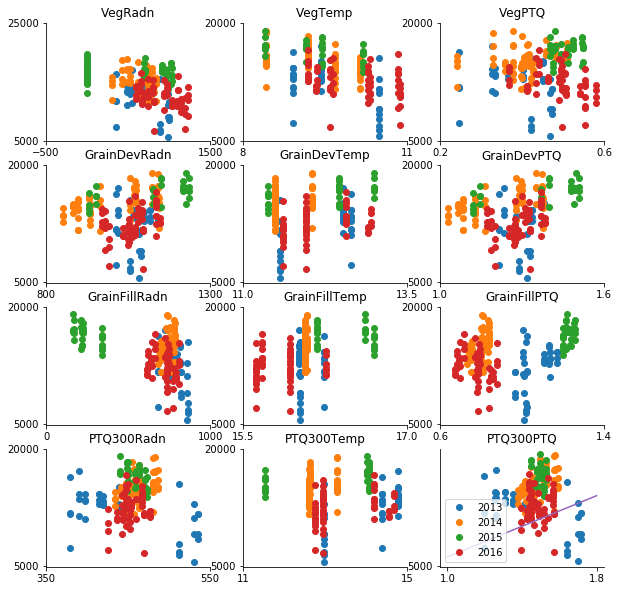

In [106]:
YVariable = 'Grain14Percent'
ComponentPairs = [['VegRadn',YVariable],
                  ['VegTemp',YVariable],
                  ['VegPTQ',YVariable],
                  ['GrainDevRadn',YVariable],
                  ['GrainDevTemp',YVariable],
                  ['GrainDevPTQ',YVariable],
                  ['GrainFillRadn',YVariable],
                  ['GrainFillTemp',YVariable],
                  ['GrainFillPTQ',YVariable],
                  ['PTQ300Radn', YVariable], #added extra block to graph looking at 300dd before anthesis
                  ['PTQ300Temp', YVariable],
                  ['PTQ300PTQ', YVariable]]
Graph = plt.figure(figsize=(10,10))
pos = 1
for Component in ComponentPairs:
    Ax = Graph.add_subplot(4,3,pos) #changed dimensions to handle 3 more plots
    Ax.spines['right'].set_visible(False)
    Ax.spines['top'].set_visible(False)
    plt.tick_params(axis='x', which='both', bottom='on',top='off', labelbottom='on')
    plt.tick_params(axis='y', which='both', left='on',right='off', labelbottom='on')
    for Year in YearList:
        XData = IndexedData.loc[Year,Component[0]]#.groupby(level='SowingDate').mean()
        YData = pd.to_numeric(IndexedData.loc[Year,Component[1]])#.groupby(level='SowingDate').mean()
        plt.plot(XData,YData,'o',label=Year)
        #plt.ylabel(Component[1])
        plt.title(Component[0])
    Ax.set_xticks([Ax.get_xticks()[0],Ax.get_xticks()[-1]])
    Ax.set_yticks([Ax.get_yticks()[1],Ax.get_yticks()[-1]])
    if pos == 12:
        plt.legend(loc=0,numpoints=1)
        xs = [1,1.8] # create array for yield = -3.45 + 9.59*PTQ
        ys=[-3.45+9.59,-3.45+9.59*1.8]
        ys = np.multiply(ys,1000) #change units
        plt.plot(xs,ys,'-') #plot line on PTQ graph ### it's very low, perhaps due to looking at a different time period?? eg 30 days before anthesis
    pos+=1

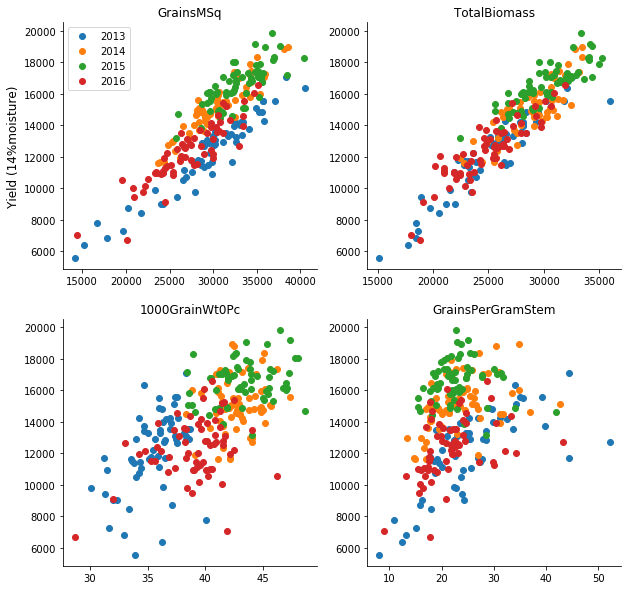

In [107]:
ComponentPairs = [['GrainsMSq','Grain14Percent'],
                  ['TotalBiomass','Grain14Percent'],
                  ['1000GrainWt0Pc','Grain14Percent'],
                 ['GrainsPerGramStem','Grain14Percent']]
Graph = plt.figure(figsize=(10,10))
pos = 1
for Component in ComponentPairs:
    Ax = Graph.add_subplot(2,2,pos)
    Ax.spines['right'].set_visible(False)
    Ax.spines['top'].set_visible(False)
    plt.tick_params(axis='x', which='both', bottom='on',top='off', labelbottom='on')
    plt.tick_params(axis='y', which='both', left='on',right='off', labelbottom='on')
    for Year in YearList:
        XData = IndexedData.loc[Year,Component[0]]
        YData = IndexedData.loc[Year,Component[1]]
        plt.plot(XData,YData,'o',label=Year)
        #plt.ylabel(Component[1])
        plt.title(Component[0])
    #Ax.set_xticks([Ax.get_xticks()[0],Ax.get_xticks()[-1]])
    #Ax.set_yticks([Ax.get_yticks()[1],Ax.get_yticks()[-1]])
    #Ax.set_xticklabels(['Less','More'])
    #Ax.set_yticklabels(['Modest','Jolly Good'])
    if pos == 1:
        plt.legend(loc=0,numpoints=1)
        plt.ylabel('Yield (14%moisture)',fontsize = 12)
    pos+=1

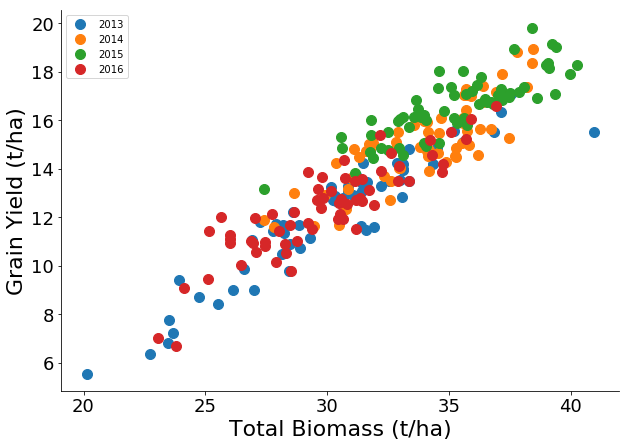

In [108]:
Graph = plt.figure(figsize=(10,7))
Ax = Graph.add_subplot(1,1,1)
Ax.spines['right'].set_visible(False)
Ax.spines['top'].set_visible(False)
plt.tick_params(axis='x', which='both', bottom='on',top='off', labelbottom='on')
plt.tick_params(axis='y', which='both', left='on',right='off', labelbottom='on')
for Year in YearList:
    XData = IndexedData.loc[Year,'TotalBiomass']
    YData = IndexedData.loc[Year,'Grain14Percent']
    plt.plot(XData,YData,'o',label=Year,markersize = 10)
    #plt.ylabel(Component[1])
    #plt.title(Component[0])
plt.legend(loc=0,numpoints=1)
plt.ylabel('Grain Yield (t/ha)',fontsize = 22)
plt.xlabel('Total Biomass (t/ha)',fontsize = 22)
#plt.xlabel(r'$Grains /m^2$',fontsize = 22)
plt.tick_params(labelsize=18)
Ax.xaxis.set_ticklabels([15,20,25,30,35,40])
Ax.yaxis.set_ticklabels([4,6,8,10,12,14,16,18,20])

## Single variable Harvest correlations

In [109]:
'GrainsMSq','Grain14Percent','EarsMSq','StemsMSq','GrainsEar',
'ThousandGrainWeight','GrainsPerGramStem','TotalBiomass','HI','StemBiomass'

('ThousandGrainWeight',
 'GrainsPerGramStem',
 'TotalBiomass',
 'HI',
 'StemBiomass')

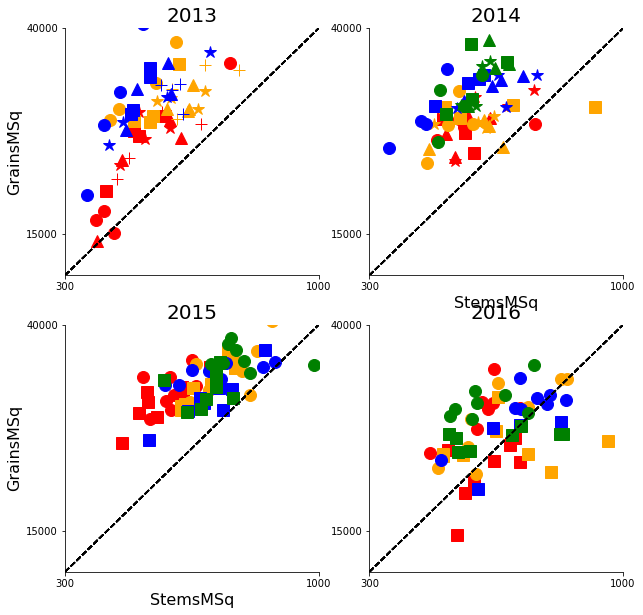

In [110]:
XVar = 'StemsMSq'
YVar = 'GrainsMSq'
MakeSingleVariableRegression(XVar,YVar)

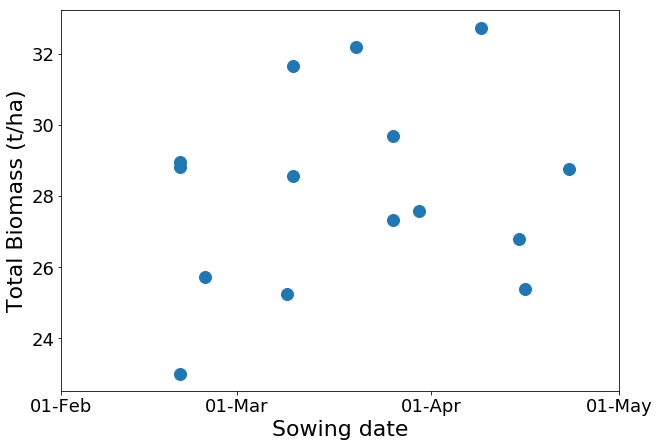

In [111]:
Graph = plt.figure(figsize=(10,7))
import matplotlib.dates as mdates

filter = (IndexedData.Cultivar == 'Wakanui') & (IndexedData.SampleGS=='GS90')
SowDateMeans = pd.DataFrame(IndexedData.loc[filter,'TotalBiomass'].groupby(level='SowingDate').mean())
SowDateMeans.loc[:,'SowJDay'] = [dt.datetime(2010,1,1) + (x - dt.datetime(x.year,1,1)) for x in SowDateMeans.index]
#SowDateMeans.index.strftime('%d-%b')
ax = Graph.add_subplot(1,1,1)
plt.plot(SowDateMeans.SowJDay,SowDateMeans.TotalBiomass,'o',markersize=12)
myFmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_formatter(myFmt)
plt.xlim('2010-02-01','2010-05-01')
ax.xaxis.set_ticks(['2010-02-01','2010-03-01','2010-04-01','2010-05-01'])
plt.ylabel('Total Biomass (t/ha)',fontsize=22)
plt.xlabel('Sowing date',fontsize=22)
plt.tick_params(labelsize=18)
ax.yaxis.set_ticklabels([22,24,26,28,30,32,34])

In [112]:
SowDate = 45
Ymax,TtSen,TtMat,Xo,b = 1.0,1500,2560,540,120
XTemp = [-10,0,15,25,35]
YRUE = [0,0,16,16,0]
HI = 0.55

PotYield = pd.read_csv('LincolnClean.met',sep='\t')
PotYield = PotYield.loc[SowDate:,:]
PotYield.set_index('Date', inplace=True)
PotYield.index = PotYield.index.to_datetime()
PotYield.loc[:,'MeanT'] = np.divide(np.add(PotYield.loc[:,'MinT'],PotYield.loc[:,'MaxT']),2)
PotYield.loc[:,'AccumTt'] = PotYield.loc[:,'MeanT'].cumsum()

PotYield.loc[:,'DAS'] = 0
for x in PotYield.iloc[1:,:].index:
    if PotYield.loc[x,'Day']==SowDate:
        PotYield.loc[x,'DAS'] = 0
    else:
        PotYield.loc[x,'DAS'] = PotYield.loc[x-dt.timedelta(1),'DAS'] + 1

PotYield.loc[:,'SowDateTt'] = 0
for x in PotYield.iloc[1:,:].index:
    if PotYield.loc[x,'Day']==SowDate:
        PotYield.loc[x,'SowDateTt'] = PotYield.loc[x,'AccumTt']
    else:
        PotYield.loc[x,'SowDateTt'] = PotYield.loc[x-dt.timedelta(1),'SowDateTt']

PotYield.loc[:,'Tt']= PotYield.loc[:,'AccumTt'] - PotYield.loc[:,'SowDateTt']

for date in PotYield.index:
    if PotYield.loc[date,'Tt'] < TtSen:
        PotYield.loc[date,'cover'] = Ymax/(1+np.exp(-(PotYield.loc[date,'Tt']-Xo)/b))
    else:
        if PotYield.loc[date,'Tt'] < TtMat:
            SenRate = Ymax/(TtMat - TtSen)
            PotYield.loc[date,'cover'] = Ymax-(PotYield.loc[date,'Tt'] - TtSen)*SenRate
        else:
            PotYield.loc[date,'cover'] = 0

PotYield.loc[:,'IntRadn'] = PotYield.loc[:,'cover'] * PotYield.loc[:,'Radn']
PotYield.loc[:,'RUE'] = [np.interp(PotYield.loc[x,'MeanT'],XTemp,YRUE) for x in PotYield.index]
PotYield.loc[:,'PotDM'] = PotYield.loc[:,'RUE'] * PotYield.loc[:,'IntRadn']

PotYield.loc[:,'PotBiomass'] = 0.0
for date in PotYield.iloc[2:,:].index:
    if PotYield.loc[date,'cover'] == 0.0:
        PotYield.loc[date,'PotBiomass'] = 0
    else:
        PotYield.loc[date,'PotBiomass'] = PotYield.loc[date-dt.timedelta(1),'PotBiomass'] + PotYield.loc[date,'PotDM']

PotYield.loc[:,'PotYield'] = PotYield.loc[:,'PotBiomass'] * HI

Years = list(PotYield.Year.drop_duplicates())

AnnualYields = pd.DataFrame(index=Years,columns=['Yield'])

for year in Years:
    AnnualYields.loc[year,'Yield'] = PotYield.loc[PotYield.Year==year,'PotYield'].max()

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  # Remove the CWD from sys.path while we load stuff.


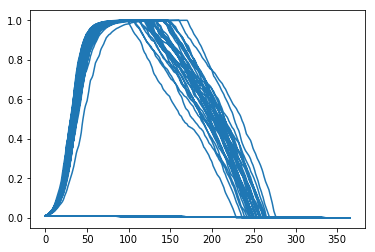

In [113]:
plt.plot(PotYield.DAS,PotYield.cover)

In [114]:
Median = PotYield.cover.groupby(by=PotYield.DAS).median()
Range = PotYield.cover.groupby(by=PotYield.DAS).sem()
Lower = Median - Range
Upper = Median + Range

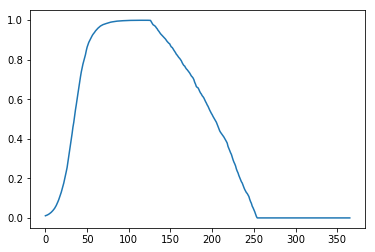

In [115]:
plt.plot(Median)

In [116]:
Year

2016

In [117]:
filter = IndexedData.SampleGS = 'GS90'
IndexedData.GS65.dropna()

YearSown  SowingDate  Cultivar  PlantPopn  PGRCanopyMgmtTrt
2013      2013-02-20  Wakanui   50         Normal             2013-11-16
                                           Normal             2013-11-16
                                           Normal             2013-11-16
                                           Normal             2013-11-16
                                           Normal             2013-11-16
                                           Normal             2013-11-16
                                           Normal             2013-11-16
                                           Normal             2013-11-16
                                           Normal             2013-11-16
                                           Normal             2013-11-16
                                           Normal             2013-11-16
                                           Normal             2013-11-16
                                           Normal             20

In [118]:
AnnualYields

,Yield
1986,7897.1
1987,6288.88
1988,6490.94
1989,7137.57
1990,7109.57
1991,7641.24
1992,8055.77
1993,7771.69
1994,7786.2
1995,7164.61
